In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb

k2_object = pd.read_csv("K2 Planets and Candidates.csv",
                        comment="#",
                        on_bad_lines="skip",
                        sep=",",
                        engine="python")
print(k2_object.shape)
print(k2_object.info())

(3992, 94)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          3992 non-null   object 
 1   hostname         3992 non-null   object 
 2   default_flag     3992 non-null   int64  
 3   disposition      3992 non-null   object 
 4   disp_refname     3992 non-null   object 
 5   sy_snum          3975 non-null   float64
 6   sy_pnum          3975 non-null   float64
 7   discoverymethod  3975 non-null   object 
 8   disc_year        3975 non-null   float64
 9   disc_facility    3975 non-null   object 
 10  soltype          3975 non-null   object 
 11  pl_controv_flag  3975 non-null   float64
 12  pl_refname       3975 non-null   object 
 13  pl_orbper        3925 non-null   float64
 14  pl_orbpererr1    3040 non-null   float64
 15  pl_orbpererr2    3040 non-null   float64
 16  pl_orbperlim     3925 non-null   float64
 17  pl_

In [2]:
print(k2_object.isnull().sum())

pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
                  ..
sy_gaiamagerr1    79
sy_gaiamagerr2    79
rowupdate         23
pl_pubdate        23
releasedate       23
Length: 94, dtype: int64


In [3]:
error_cols = ['pl_orbpererr1','pl_orbpererr2','pl_orbsmaxerr1','pl_orbsmaxerr2','pl_radeerr1',
            'pl_radeerr2','pl_radjerr1','pl_radjerr2','pl_bmassjerr1','pl_bmassjerr2',
            'pl_orbeccenerr1','pl_orbeccenerr2','pl_insolerr1','pl_insolerr2','pl_eqterr1',
            'pl_eqterr2','st_tefferr1','st_tefferr2','st_raderr1','st_raderr2','st_masserr1',
            'st_masserr2','st_meterr1','st_meterr2','st_loggerr1','sy_kmagerr2',
            'sy_gaiamagerr1','sy_gaiamagerr2','sy_disterr1','sy_disterr2','sy_vmagerr1','sy_vmagerr2',
            'sy_kmagerr1','st_loggerr2','pl_bmasseerr2','pl_bmasseerr1']
k2_object.drop(error_cols,axis=1,inplace=True)
print(k2_object.isnull().sum())

pl_name               0
hostname              0
default_flag          0
disposition           0
disp_refname          0
sy_snum              17
sy_pnum              17
discoverymethod      17
disc_year            17
disc_facility        17
soltype              17
pl_controv_flag      17
pl_refname           17
pl_orbper            67
pl_orbperlim         67
pl_orbsmax         3180
pl_orbsmaxlim      3180
pl_rade             843
pl_radelim          843
pl_radj             843
pl_radjlim          843
pl_bmasse          3564
pl_bmasselim       3564
pl_bmassj          3564
pl_bmassjlim       3564
pl_bmassprov       3564
pl_orbeccen        3570
pl_orbeccenlim     3570
pl_insol           3374
pl_insollim        3374
pl_eqt             3158
pl_eqtlim          3158
ttv_flag             23
st_refname           39
st_spectype        3559
st_teff            1126
st_tefflim         1126
st_rad              146
st_radlim           146
st_mass            1903
st_masslim         1903
st_met          

In [4]:
limit_cols = ["pl_orbperlim","pl_orbsmaxlim","pl_radelim","pl_radjlim","pl_bmasselim",
    "pl_bmassjlim","pl_orbeccenlim","pl_insollim","pl_eqtlim","st_tefflim","st_radlim","st_masslim",
    "st_metlim","st_logglim"]
k2_object.drop(limit_cols,axis=1,inplace=True)
k2_object.isnull().sum()[k2_object.isnull().sum() > 0]


sy_snum              17
sy_pnum              17
discoverymethod      17
disc_year            17
disc_facility        17
soltype              17
pl_controv_flag      17
pl_refname           17
pl_orbper            67
pl_orbsmax         3180
pl_rade             843
pl_radj             843
pl_bmasse          3564
pl_bmassj          3564
pl_bmassprov       3564
pl_orbeccen        3570
pl_insol           3374
pl_eqt             3158
ttv_flag             23
st_refname           39
st_spectype        3559
st_teff            1126
st_rad              146
st_mass            1903
st_met             2301
st_metratio        2304
st_logg            1656
sy_refname           23
rastr                23
ra                   23
decstr               23
dec                  23
sy_dist             148
sy_vmag              65
sy_kmag              46
sy_gaiamag           79
rowupdate            23
pl_pubdate           23
releasedate          23
dtype: int64

In [5]:
drop_cols = ['pl_orbsmax','pl_bmasse','pl_bmassj','pl_bmassprov','pl_orbeccen','pl_insol','pl_eqt',
             'st_spectype','st_met','st_metratio','sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 
            'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname',
            'st_refname', 'sy_refname', 'rastr', 'ra', 'decstr', 'dec',
            'rowupdate', 'pl_pubdate', 'releasedate']
k2_object.drop(drop_cols,axis=1,inplace=True)
k2_object.isnull().sum()[k2_object.isnull().sum() > 0]

pl_orbper       67
pl_rade        843
pl_radj        843
ttv_flag        23
st_teff       1126
st_rad         146
st_mass       1903
st_logg       1656
sy_dist        148
sy_vmag         65
sy_kmag         46
sy_gaiamag      79
dtype: int64

<Axes: xlabel='pl_orbper', ylabel='Count'>

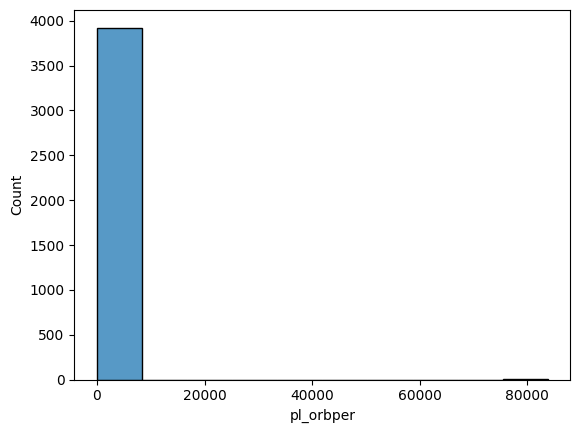

In [6]:
sb.histplot(x="pl_orbper",data=k2_object,bins=10)

<Axes: xlabel='pl_rade', ylabel='Count'>

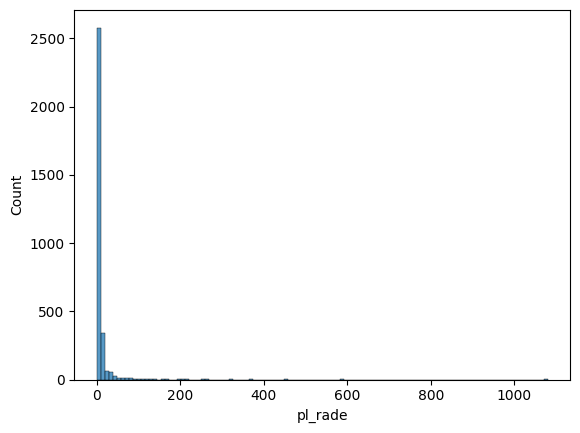

In [7]:
sb.histplot(x="pl_rade",data=k2_object)

<Axes: xlabel='pl_radj', ylabel='Count'>

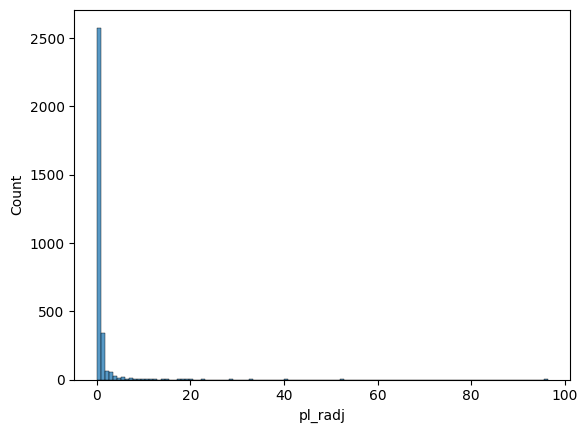

In [8]:
sb.histplot(x="pl_radj",data=k2_object)

<Axes: xlabel='ttv_flag', ylabel='Count'>

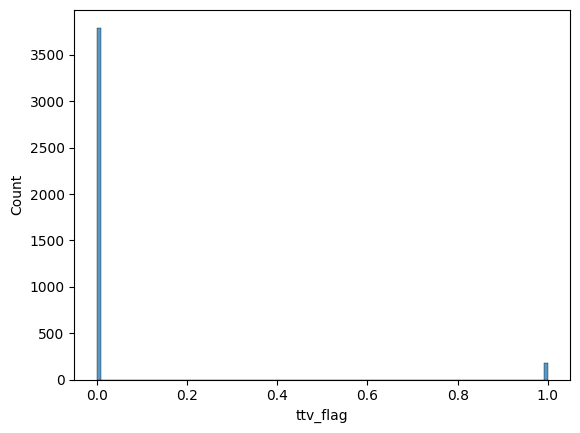

In [9]:
sb.histplot(x="ttv_flag",data=k2_object)

<Axes: xlabel='st_teff', ylabel='Count'>

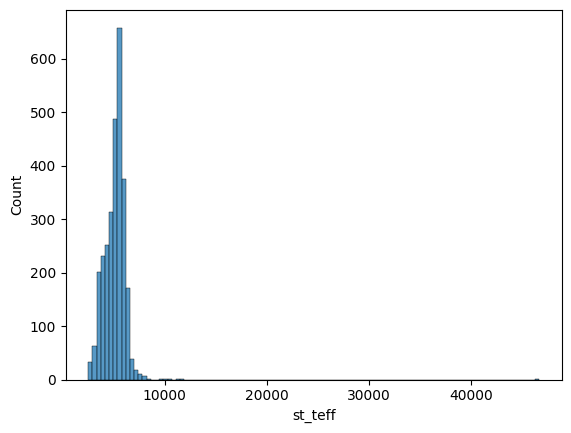

In [10]:
sb.histplot(x="st_teff",data=k2_object)

<Axes: xlabel='st_rad', ylabel='Count'>

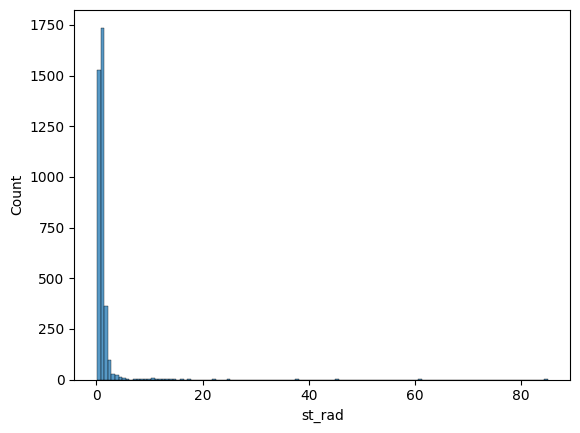

In [11]:
sb.histplot(x="st_rad",data=k2_object)

<Axes: xlabel='st_mass', ylabel='Count'>

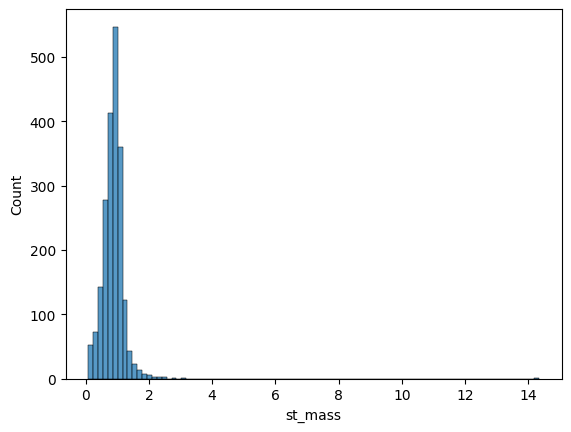

In [12]:
sb.histplot(x="st_mass",data=k2_object)

<Axes: xlabel='st_logg', ylabel='Count'>

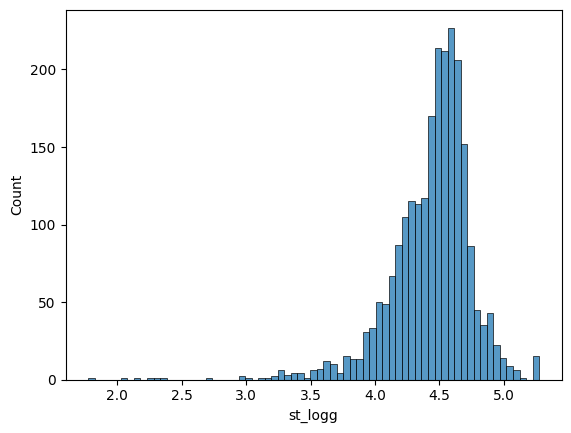

In [13]:
sb.histplot(x="st_logg",data=k2_object)

<Axes: xlabel='sy_dist', ylabel='Count'>

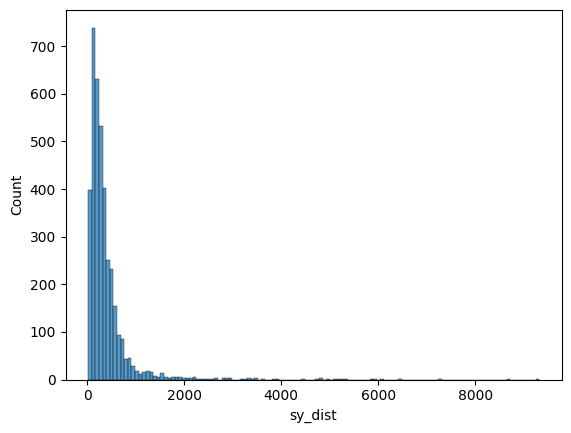

In [14]:
sb.histplot(x="sy_dist",data=k2_object)

<Axes: xlabel='sy_vmag', ylabel='Count'>

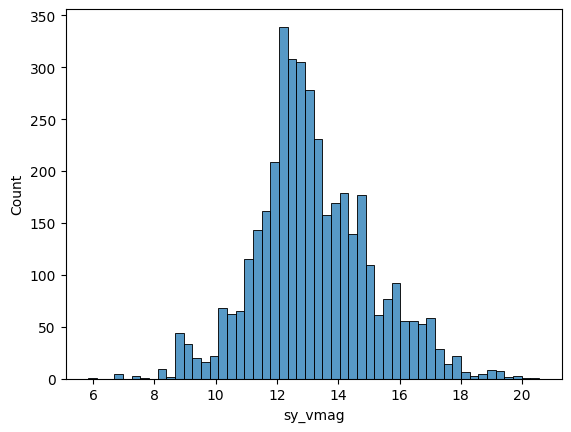

In [15]:
sb.histplot(x="sy_vmag",data=k2_object)

<Axes: xlabel='sy_kmag', ylabel='Count'>

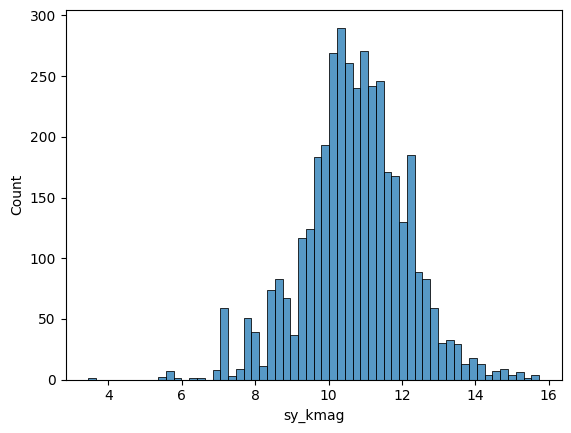

In [16]:
sb.histplot(x="sy_kmag",data=k2_object)

<Axes: xlabel='sy_gaiamag', ylabel='Count'>

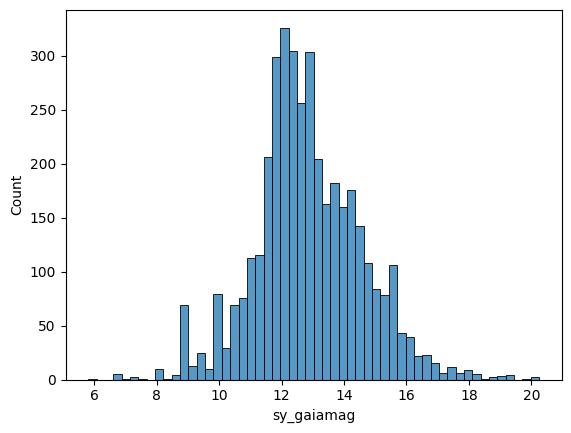

In [17]:
sb.histplot(x="sy_gaiamag",data=k2_object)

In [18]:
missing_cols = ["pl_orbper","pl_rade","pl_radj","ttv_flag","st_teff","st_rad","st_mass","st_logg",
    "sy_dist","sy_vmag","sy_kmag","sy_gaiamag"]
for col in missing_cols:
    k2_object[col].fillna(k2_object[col].median(),inplace=True)
print(k2_object.isnull().sum())


pl_name         0
hostname        0
default_flag    0
disposition     0
disp_refname    0
pl_orbper       0
pl_rade         0
pl_radj         0
ttv_flag        0
st_teff         0
st_rad          0
st_mass         0
st_logg         0
sy_dist         0
sy_vmag         0
sy_kmag         0
sy_gaiamag      0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5948\742009564.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  k2_object[col].fillna(k2_object[col].median(),inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5948\742009564.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [19]:
print(k2_object.columns.tolist())

['pl_name', 'hostname', 'default_flag', 'disposition', 'disp_refname', 'pl_orbper', 'pl_rade', 'pl_radj', 'ttv_flag', 'st_teff', 'st_rad', 'st_mass', 'st_logg', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag']


In [20]:
k2_object.to_csv("K2_cleaned.csv",index=False)